<a href="https://colab.research.google.com/github/DionesGouvea/ENEM/blob/main/ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Contexto analíico**

A área de marketing de uma EdTech quer mapear os perfis dos candidatos do ENEM e, nesse projeto, os analistas precisam entender quais características estão associadas a um bom ou mau desempenho de um candidato na prova. 

**INTERPRETABILIDADE** - Construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para os analistas no quesito desempenho do candidato no exame. Ou seja, o foco será na interpretação dos coeficientes (exemplo: se o candidato for de uma escola pública o valor Y da sua nota média irá aumentar quanto?).

**PREDIÇÃO** -  Construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e com o intuito de ser usado em uma página web como preditora de desempenho. Note que, em casos como esse, queremos ter o menor erro possível, mesmo que o modelo seja complexo e tenha uma interpretação mais difícil.

## Importando os Dados e Bibliotecas

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [76]:
from google.colab import drive 
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Analise Exploratoria

In [85]:
df = pd.read_csv('/content/gdrive/MyDrive/Tera/Data/Base_Enem.csv')
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
0,210054403757,2021,14,M,2,3,1,1,15,1,...,A,A,B,A,A,B,A,A,A,NaN
1,210053662224,2021,5,F,1,3,1,1,4,1,...,A,A,B,A,A,C,A,B,B,546.56
2,210053154359,2021,14,F,0,3,1,1,12,1,...,A,A,B,A,A,B,A,A,A,431.38
3,210054036560,2021,3,F,1,4,1,2,0,2,...,A,A,B,A,A,C,A,A,B,565.80
4,210051462654,2021,2,F,1,4,1,2,0,3,...,A,A,E,A,A,E,A,B,B,576.12


In [78]:
df.info(null_counts=True)

<ipython-input-78-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168979 entries, 0 to 168978
Data columns (total 77 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            168979 non-null  int64  
 1   NU_ANO                  168979 non-null  int64  
 2   TP_FAIXA_ETARIA         168979 non-null  int64  
 3   TP_SEXO                 168979 non-null  object 
 4   TP_ESTADO_CIVIL         168979 non-null  int64  
 5   TP_COR_RACA             168979 non-null  int64  
 6   TP_NACIONALIDADE        168979 non-null  int64  
 7   TP_ST_CONCLUSAO         168979 non-null  int64  
 8   TP_ANO_CONCLUIU         168979 non-null  int64  
 9   TP_ESCOLA               168979 non-null  int64  
 10  TP_ENSINO               53356 non-null   float64
 11  IN_TREINEIRO            168979 non-null  int64  
 12  CO_MUNICIPIO_ESC        39736 non-null   float64
 13  NO_MUNICIPIO_ESC        39736 non-null   object 
 14  CO_UF_ESC           

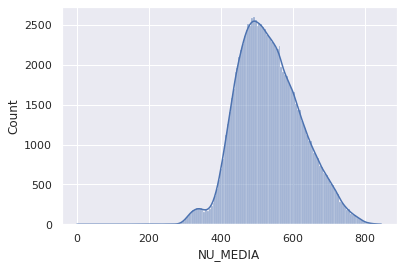

In [79]:
#verificando a distribuição da nossa variavel target 
sns.set_theme()
sns.histplot(df['NU_MEDIA'], kde = 'True')

Text(0, 0.5, 'Numero de Estudantes')

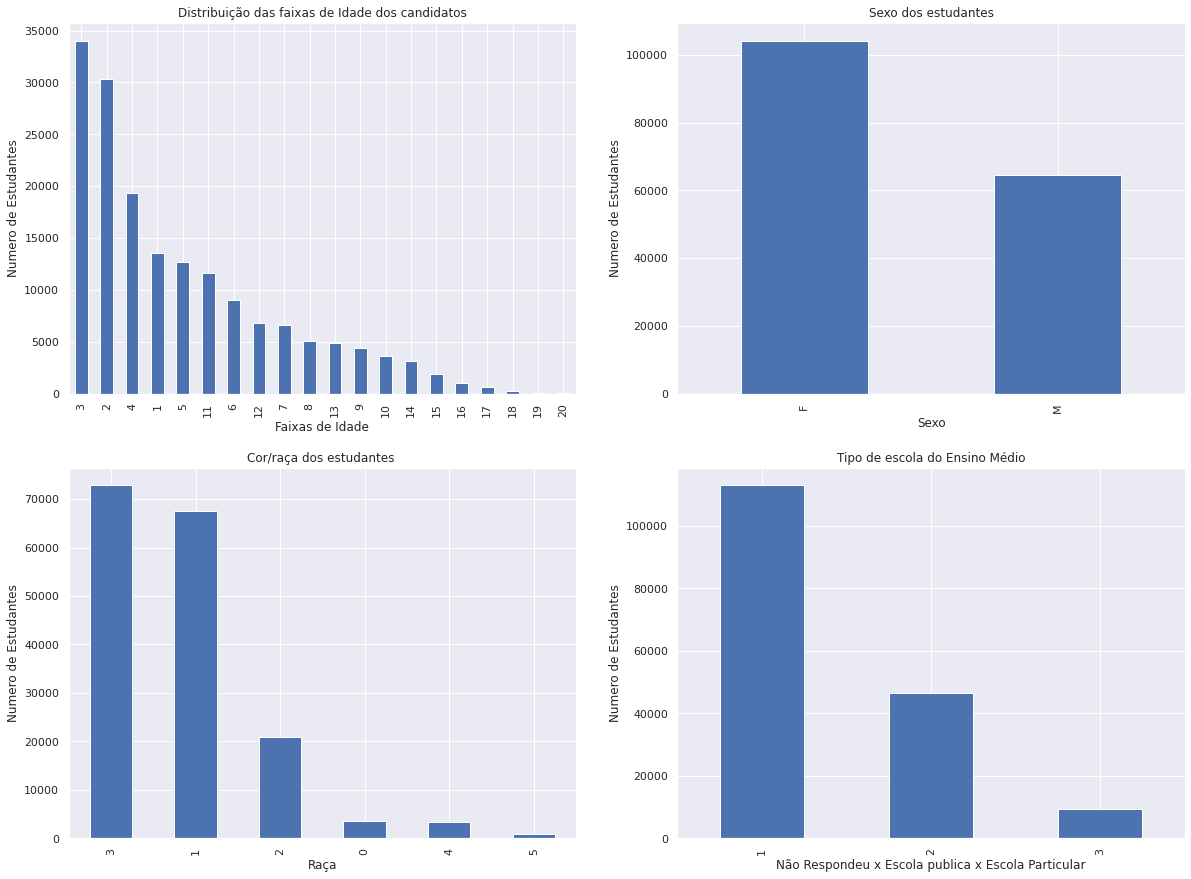

In [80]:
#verificando algumas distribuições 
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
df.TP_FAIXA_ETARIA.value_counts().plot(kind='bar')
plt.title('Distribuição das faixas de Idade dos candidatos')
plt.xlabel('Faixas de Idade')
plt.ylabel('Numero de Estudantes')

plt.subplot(2,2,2)
df.TP_SEXO.value_counts().plot(kind='bar')
plt.title('Sexo dos estudantes')
plt.xlabel('Sexo')
plt.ylabel('Numero de Estudantes')

plt.subplot(2,2,3)
df.TP_COR_RACA.value_counts().plot(kind='bar')
plt.title('Cor/raça dos estudantes ')
plt.xlabel('Raça')
plt.ylabel('Numero de Estudantes')

plt.subplot(2,2,4)
df.TP_ESCOLA.value_counts().plot(kind='bar')
plt.title('Tipo de escola do Ensino Médio')
plt.xlabel('Não Respondeu x Escola publica x Escola Particular')
plt.ylabel('Numero de Estudantes')

###Mapeando algumas colunas para melhor entendimento 

In [55]:
df_backup = df

In [81]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({0:'Não_declarado',1:"Branca",2:'Preta',3:'Parda',4:'Amarela',5:'Indígena',6:'Sem_informação'})
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({1:'Nao_respondeu', 2:'Escola_Publica', 3:'Escola_particular' })

###Analise Bivariada 

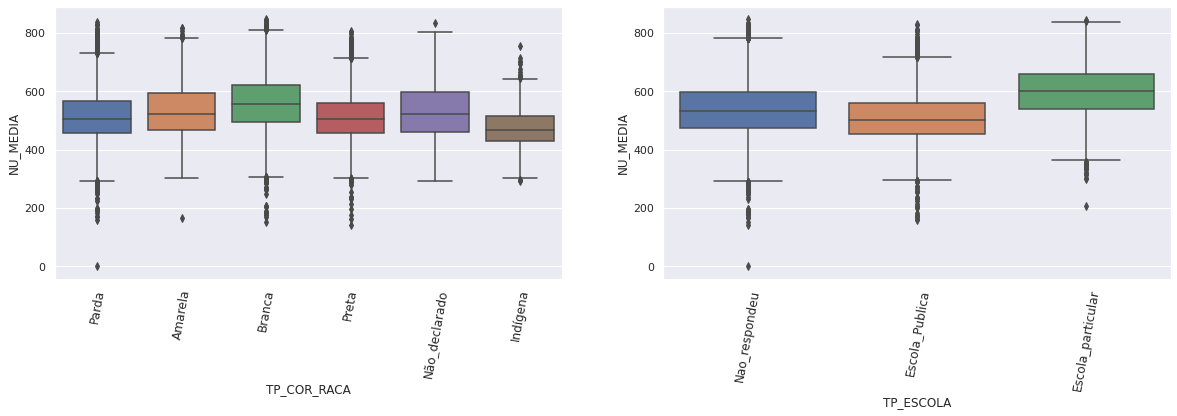

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'TP_COR_RACA', y='NU_MEDIA', data = df)
plt.xticks(fontsize = 12,rotation =80);

plt.subplot(1,2,2)
sns.boxplot(x = 'TP_ESCOLA', y='NU_MEDIA', data = df)
plt.xticks(fontsize = 12,rotation =80);

É possivel perceber que o fato de ter estudado em escola publica ou privada e raça/etnia afetam na nota do aluno 

In [87]:
#Criando uma matriz para visualizar o questionario 

quest = [['Q001','Q002'],['Q003','Q004'],['Q005','Q006'],['Q007','Q008'],['Q009','Q010'],['Q011','Q012'],['Q013','Q014'],['Q015','Q016']
,['Q017','Q018'],['Q019','Q020'],['Q021','Q022'],['Q023','Q024'],['Q025','']]

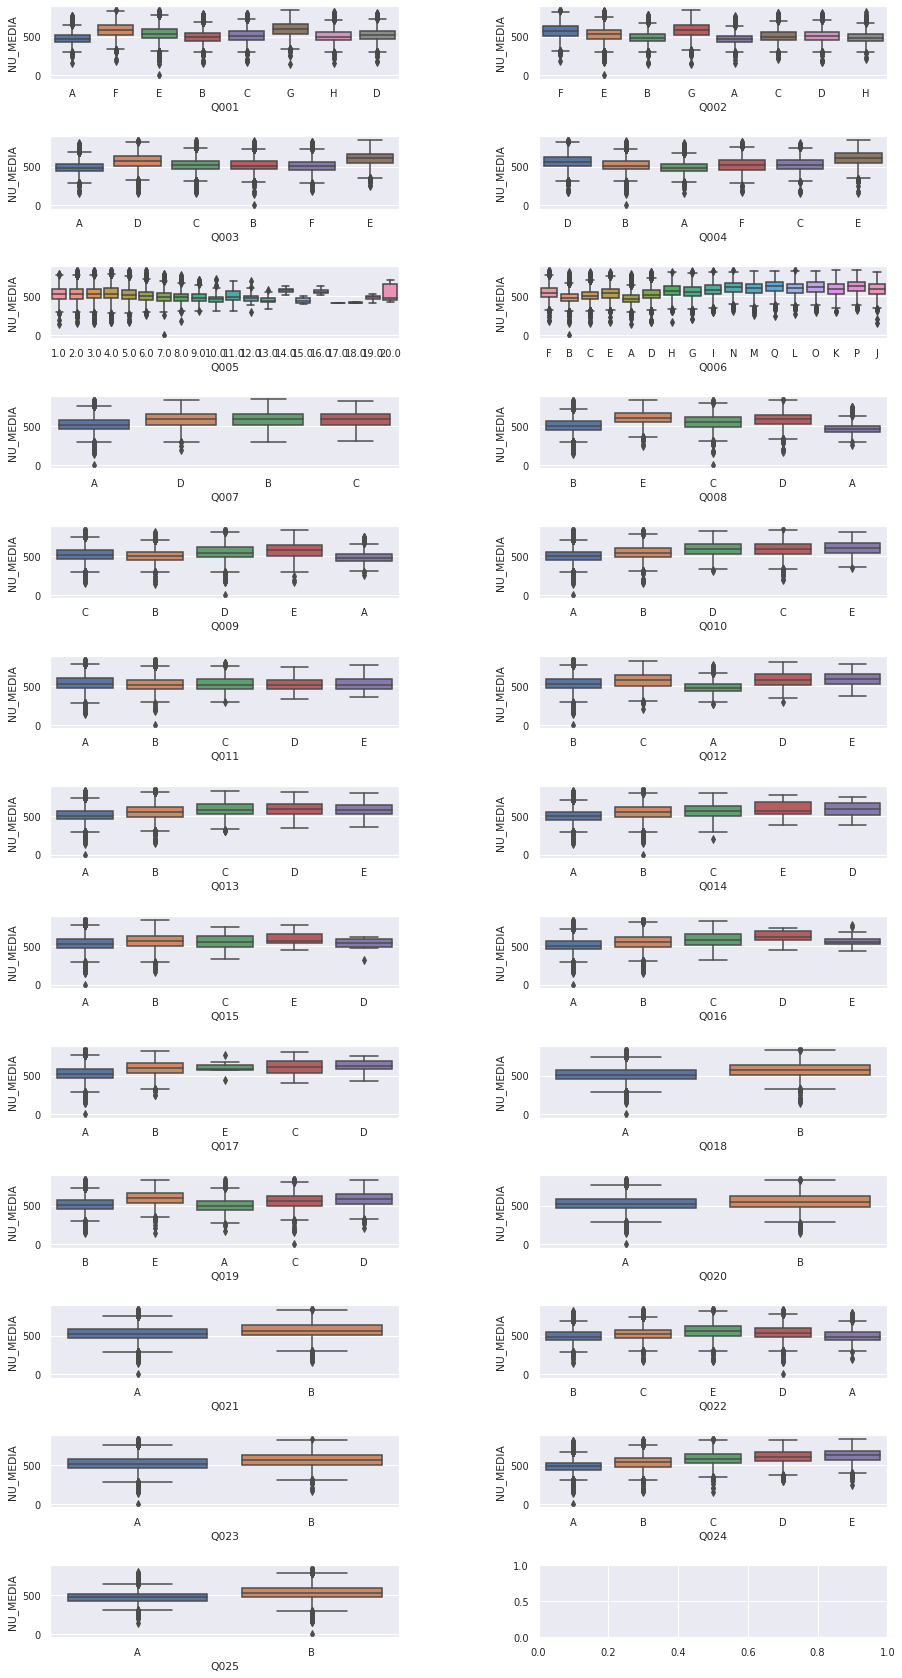

In [89]:
#Visualizando a relação do questionario com a variavel target
sns.set(font_scale=0.9)
fig, eixo = plt.subplots(13,2,figsize=(15,30)) # Criando uma figura de 22 linhas x 2 colunas para nossa matriz
fig.subplots_adjust(hspace=0.8, wspace=0.4)
# Para cada linha 
for linha in range(13):
    # Para cada coluna   
    for coluna in range(2): 
      try:
        sns.boxplot(data=df,x=quest[linha][coluna],y='NU_MEDIA',ax=eixo[linha][coluna])
      except ValueError:
        pass  

O principal foco do questionario e entender as condições socioeconomicas dos candidatos que realizaram a prova, fica claro que pessoas que possuem familiares que ja possuem ensino superior, melhores condições financeiras,acesso a tecnologia, e maior numero de bens, tem maiores chances de ter um desempenho maior no ENEM.

### Visualizando a correlação com Heatmap

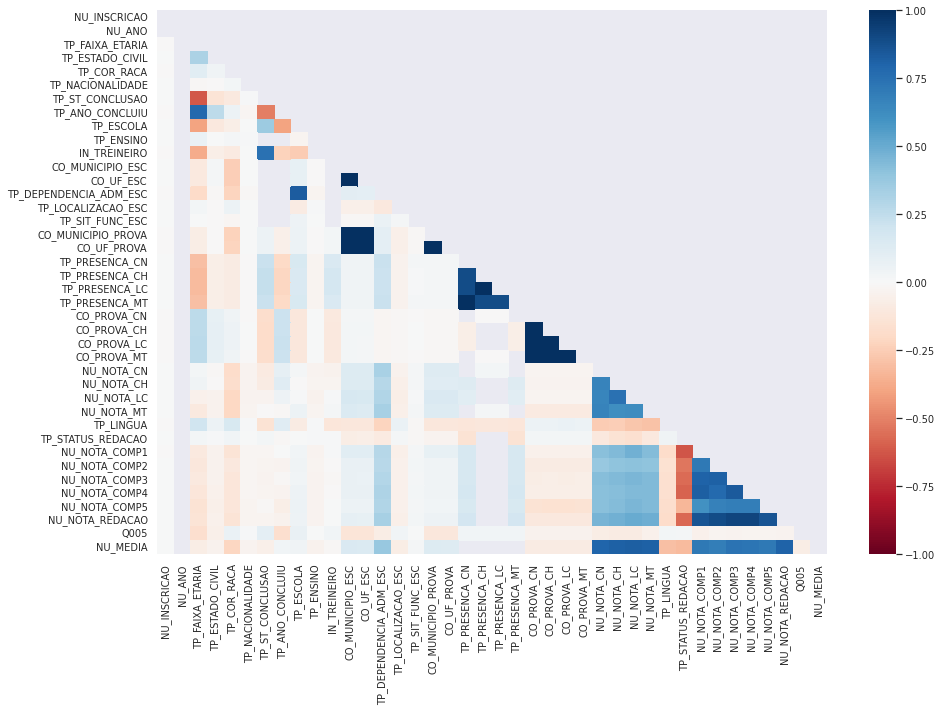

In [92]:

# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação
    vmin=-1, 
    vmax=1,
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(df.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()
     

In [94]:
corr_matrix = df.corr()
corr_matrix['NU_MEDIA'].sort_values(ascending = False)

NU_MEDIA                  1.000000
NU_NOTA_LC                0.820422
NU_NOTA_CH                0.819011
NU_NOTA_MT                0.813919
NU_NOTA_REDACAO           0.810836
NU_NOTA_CN                0.798062
NU_NOTA_COMP3             0.737288
NU_NOTA_COMP4             0.727627
NU_NOTA_COMP1             0.713261
NU_NOTA_COMP5             0.711422
NU_NOTA_COMP2             0.691030
TP_DEPENDENCIA_ADM_ESC    0.382426
CO_MUNICIPIO_ESC          0.149049
CO_UF_ESC                 0.147161
CO_MUNICIPIO_PROVA        0.133994
CO_UF_PROVA               0.132368
TP_ESCOLA                 0.041651
TP_ANO_CONCLUIU           0.031919
TP_SIT_FUNC_ESC           0.022478
NU_INSCRICAO              0.003501
IN_TREINEIRO             -0.009136
TP_NACIONALIDADE         -0.038552
TP_ENSINO                -0.041981
TP_ESTADO_CIVIL          -0.045188
TP_ST_CONCLUSAO          -0.055879
TP_LOCALIZACAO_ESC       -0.070909
TP_FAIXA_ETARIA          -0.073895
Q005                     -0.075912
CO_PROVA_CH         

##Feature Enginering

##1. Objetivo I - Regressão Linear para interpretabilidade